# The survival of patients who had undergone surgery for breast cancer

## Heberman dataset
    survival of patients who had undergone surgery for breast cancer at the University of Chicago's Billings Hospital.

* The dataframe consist of 305 rows × 4 columns.
* Columns for the dataframe are 
        - age 
        - Year of operation 
        - Number of positive axillary nodes detected (numerical)
        - 1 = the patient survived 2 = the patient died 

* Case study of 305 patients
* On the total dataset we have 224 patients survived and 81 died.

### Objective

* The ultimate aim of this Analysis is to predict the survival status of the women, diagonosed with breast cancer

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9,ta;q=0.8" "https://storage.googleapis.com/kaggle-datasets/474/966/habermans-survival-data-set.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1540723231&Signature=Cii8apXC1kc19TEbdi%2B3rOXXK4Y%2B9APiDreD0wHsmnLIdD5iNJ8kt%2FqqJPgN1RBie3XlwP8fW%2BBb1nVHlK%2F8nL4lwRu9d0DFnvkPkBxh%2F9k1DhvIisfrrGCjaKk2IhkEmuYxx8rcYSVp0Snoe2FlyvlHOWqXJnV2eZBnmTQnRhNjsdECUyIxRR88%2B4ez0Qxa0oWGR%2FgtUaHxiFvZV4X1h39EG8j%2FpnqLwvuJLPjO%2BfpniygOlM7cOZ4mucfRL9TRS4BHomPmPIazyhxoX5U6OrSDPf6hYe%2B9bwukseD5f6S3aF5Fe613lwZHefexCFNBoBskAlDvq8678EQhAuSQdg%3D%3D" -O "habermans-survival-data-set.zip" -c


--2018-10-25 13:13:39--  https://storage.googleapis.com/kaggle-datasets/474/966/habermans-survival-data-set.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1540723231&Signature=Cii8apXC1kc19TEbdi%2B3rOXXK4Y%2B9APiDreD0wHsmnLIdD5iNJ8kt%2FqqJPgN1RBie3XlwP8fW%2BBb1nVHlK%2F8nL4lwRu9d0DFnvkPkBxh%2F9k1DhvIisfrrGCjaKk2IhkEmuYxx8rcYSVp0Snoe2FlyvlHOWqXJnV2eZBnmTQnRhNjsdECUyIxRR88%2B4ez0Qxa0oWGR%2FgtUaHxiFvZV4X1h39EG8j%2FpnqLwvuJLPjO%2BfpniygOlM7cOZ4mucfRL9TRS4BHomPmPIazyhxoX5U6OrSDPf6hYe%2B9bwukseD5f6S3aF5Fe613lwZHefexCFNBoBskAlDvq8678EQhAuSQdg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv('drive/My Drive/Colab Notebooks/habermans-survival-data-set.zip (Unzipped Files)/haberman.csv')


df.head(3)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


In [5]:
# converting the data for convinience 
analysis = df.rename(columns={'30': 'age','64': 'Operation_Year','1':'axial_nodes','1.1':"Surv_status"})
feature = analysis.loc[ : ,['age','Operation_Year','axial_nodes']]
analysis.head()

,age,Operation_Year,axial_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
# fetching columns of the DF
analysis.columns

Index(['age', 'Operation_Year', 'axial_nodes', 'Surv_status'], dtype='object')

In [7]:
#Checking values
analysis['Surv_status'].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

In [8]:
feature.dtypes

age               int64
Operation_Year    int64
axial_nodes       int64
dtype: object

## Bi-variate analysis
 

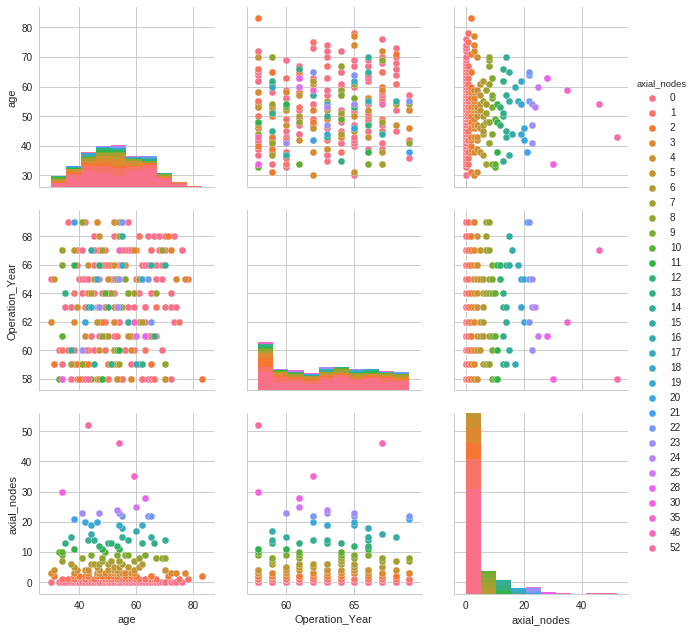

In [37]:

sns.set_style("whitegrid")
sns.pairplot(feature,hue='axial_nodes',size=3)
plt.show()

Found almost equal chances of survial and death of all ages,operation years and axial nodes.

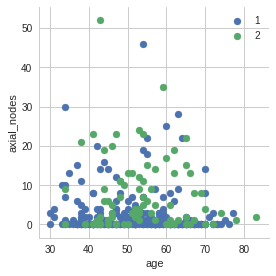

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(analysis,hue="Surv_status",size=4).map(plt.scatter,"age","axial_nodes")
plt.legend()
plt.show()

Patients with all ages are prone to death.

# Uni-Varient analysis
### PDF with Histogram

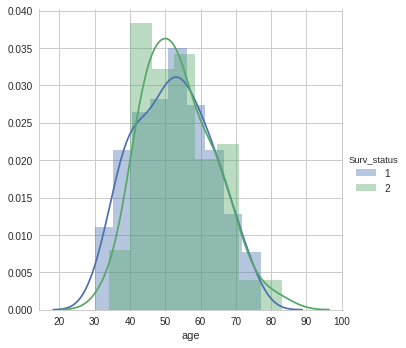

In [21]:
sns.FacetGrid(analysis, hue="Surv_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

In [19]:
analysis.columns

Index(['age', 'Operation_Year', 'axial_nodes', 'Surv_status'], dtype='object')

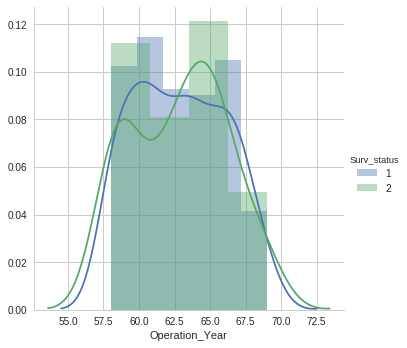

In [22]:
sns.FacetGrid(analysis, hue="Surv_status", size=5) \
   .map(sns.distplot, "Operation_Year") \
   .add_legend();
plt.show();

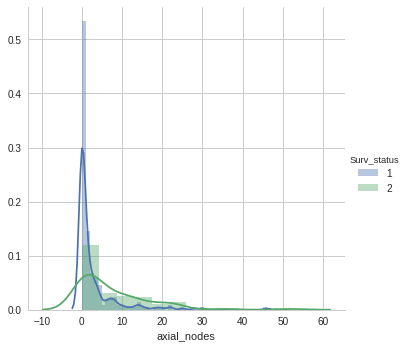

In [23]:
sns.FacetGrid(analysis, hue="Surv_status", size=5) \
   .map(sns.distplot, "axial_nodes") \
   .add_legend();
plt.show();

Found the data is extremly overlapped. Though we can choose axial_nodes > 5 are more prone to death (2)

## CDF

In [0]:
import numpy as np
analysis_Alive = analysis.loc[analysis["Surv_status"] == 1]
analysis_Death = analysis.loc[analysis["Surv_status"] == 2]

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


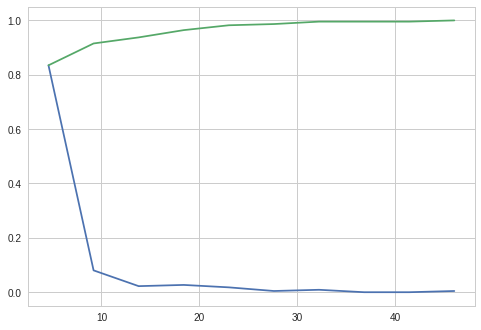

In [32]:
counts, bin_edges=np.histogram(analysis_Alive['axial_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
# CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1: ],pdf)
plt.plot(bin_edges[1: ],cdf)




[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


<function matplotlib.pyplot.show>

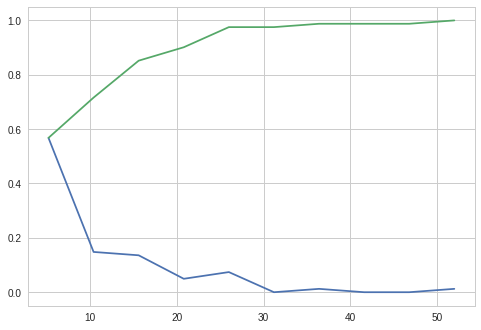

In [33]:
#Dead
counts, bin_edges=np.histogram(analysis_Death['axial_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1: ],pdf)
plt.plot(bin_edges[1: ],cdf)
plt.show

Found equal chances of survial and death until 45 axial nodes. After 45 axial nodes there are high posibility of death.

##  Box ploting

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


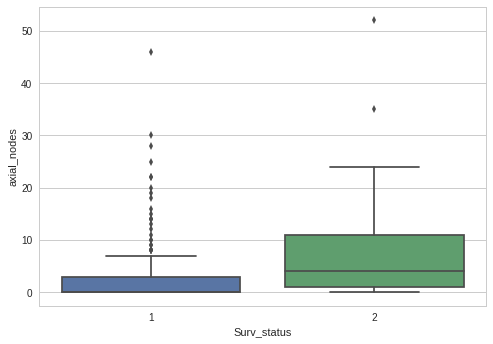

In [35]:
sns.boxplot(x='Surv_status',y='axial_nodes',data=analysis)
plt.show()

Axial_nodes (death):
   * Quantile ranges of 25 and 75 are between 2 to 12

Axial_nodes (Alive)
   * 75th quantile of axial node is at 3
   
### Median values are more accurate than mean
   *  After 3 axial_nodes there are high possibility of death.
  
## Violin plots

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


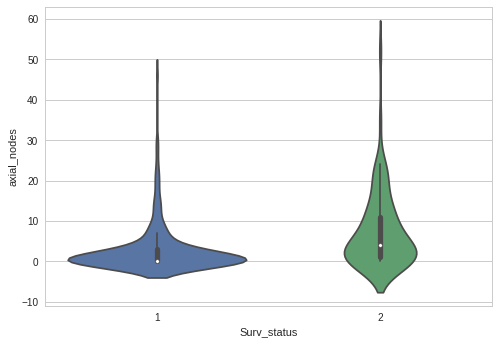

In [36]:
sns.violinplot(x="Surv_status", y="axial_nodes", data=analysis, size=8)
plt.show()

With addition to above observation found survial of axial nodes have more variance than death cases of axial_node.

# Conclution:

Women of limited axial node have possibility to survive.

limited = 3 axial_node